In [1]:
from percival.analysis.domain.entry import EntryRepository
from percival.analysis.domain.table import Table

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools

from percival.preparation.service.input_generator import InputGenerator
from percival.preparation.domain.value_objects import Smiles

In [5]:
dictionary = {"entry1": "CC", "entry2": "CCC", "entry3": "O"}

for key, value in dictionary.items():
    InputGenerator.generate_gjf_directory(Smiles(value), key)

,name,lumo+1(eV),lumo(eV),homo(eV),smiles,ROMol
0,entry1,0.367354,0.159187,-5.476294,Nc1nc2c(ncn2[C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]1,
1,entry2,0.129526,-0.997570,-6.661623,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,
2,entry3,0.551303,-0.765185,-6.497810,O=c1ccn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]1,

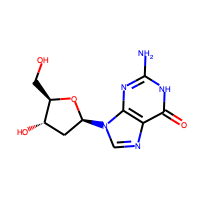
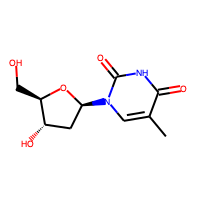
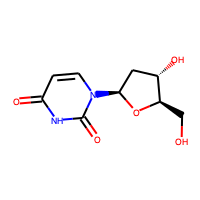

In [8]:
dir_paths = ["tests/resources/entries/entry{}".format(i) for i in range(1,4)]
entries = EntryRepository.get_entries(dir_paths)
table = Table(entries)
data = table.to_dataframe()
PandasTools.AddMoleculeColumnToFrame(data, "smiles")
data

In [9]:
print(data)

     name  lumo+1(eV)  lumo(eV)  homo(eV)  \
0  entry1    0.367354  0.159187 -5.476294   
1  entry2    0.129526 -0.997570 -6.661623   
2  entry3    0.551303 -0.765185 -6.497810   

                                              smiles  \
0  Nc1nc2c(ncn2[C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[...   
1    Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O   
2     O=c1ccn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]1   

                                               ROMol  
0  <img src="data:image/png;base64,iVBORw0KGgoAAA...  
1  <img src="data:image/png;base64,iVBORw0KGgoAAA...  
2  <img src="data:image/png;base64,iVBORw0KGgoAAA...  


In [4]:
PandasTools.AddMoleculeColumnToFrame(a, "smiles")

In [6]:
a["lumo"]

0    0.00585
1   -0.03666
2   -0.02812
Name: lumo, dtype: float64

In [1]:
entry_list = [test.conformers.minimum_energy_conformer.mol_with_structure for test in table.entries.to_list()]

NameError: name 'table' is not defined

In [15]:
a = table.to_dataframe()

In [18]:
print(a)

     name   lumo+1     lumo     homo
0  entry1  0.01350  0.00585 -0.20125
1  entry2  0.00476 -0.03666 -0.24481
2  entry3  0.02026 -0.02812 -0.23879


In [1]:
from percival.additional_calculation.domain.additional_calculation import AdditionalCalculation, AdditionalCalculationDirectory
from percival.additional_calculation.domain.value_objects import CalculationMethod, GaussianLog

In [2]:
log = GaussianLog.parse_file("tests/resources/entries/entry1/entry1_confs_0.out")

In [6]:
method = CalculationMethod("p tddft")

In [7]:
additional_calc = AdditionalCalculation(log, method)

In [8]:
acdict = AdditionalCalculationDirectory("add_calc", additional_calc)

In [13]:
acdict.additional_calculation.generate_gaussian_input(acdict.directory_path + "/fff.gjf")